In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


%matplotlib inline

In [2]:
data = pd.read_csv('lemmatized_data.csv',encoding = 'ISO-8859-1')

In [3]:
data.head(10)

,Unnamed: 0,Text,final_data,nospace,tokenized,no_punct,sw_removed,pos_tags,wn_pos,lemmatized,string_lemma
0,0,"The residents of Hamilton court society, Gurga...",the residents of hamilton court society gurga...,the residents of hamilton court society gurgao...,"['the', 'residents', 'of', 'hamilton', 'court'...","['the', 'residents', 'of', 'hamilton', 'court'...","['residents', 'hamilton', 'court', 'society', ...","[('residents', 'NNS'), ('hamilton', 'JJ'), ('c...","[('residents', 'n'), ('hamilton', 'a'), ('cour...","['resident', 'hamilton', 'court', 'society', '...",resident hamilton court society gurgaon come t...
1,1,@PMOIndia @narendramodi As a chest specialist ...,as a chest specialist doctor and responsible c...,as a chest specialist doctor and responsible c...,"['as', 'a', 'chest', 'specialist', 'doctor', '...","['as', 'a', 'chest', 'specialist', 'doctor', '...","['chest', 'specialist', 'doctor', 'responsible...","[('chest', 'JJS'), ('specialist', 'NN'), ('doc...","[('chest', 'a'), ('specialist', 'n'), ('doctor...","['chest', 'specialist', 'doctor', 'responsible...",chest specialist doctor responsible citizen wo...
2,2,"Janta curfew is not new to #Kashmir, we alread...",janta curfew is not new to we already exper...,janta curfew is not new to we already experien...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'already', 'experie...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'already', 'experie...",janta curfew new already experienced post th a...
3,3,The situation is getting worsen with every pas...,the situation is getting worsen with every pas...,the situation is getting worsen with every pas...,"['the', 'situation', 'is', 'getting', 'worsen'...","['the', 'situation', 'is', 'getting', 'worsen'...","['situation', 'getting', 'worsen', 'every', 'p...","[('situation', 'NN'), ('getting', 'VBG'), ('wo...","[('situation', 'n'), ('getting', 'v'), ('worse...","['situation', 'get', 'worsen', 'every', 'passi...",situation get worsen every passing day please ...
4,4,@narendramodi @PMOIndia Janta curfew is not ne...,janta curfew is not new to kashmir we already...,janta curfew is not new to kashmir we already ...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'kashmir', 'already...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'kashmir', 'already...",janta curfew new kashmir already experience po...
5,5,"Lets all participate in the ""JANATA CURFEW"" by...",lets all participate in the janata curfew by...,let us all participate in the janata curfew by...,"['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'participate', 'janata', 'curfew...","[('let', 'VB'), ('us', 'PRP'), ('participate',...","[('let', 'v'), ('us', 'n'), ('participate', 'v...","['let', 'u', 'participate', 'janata', 'curfew'...",let u participate janata curfew stay inside ho...
6,6,Closed for Saturday and Sunday Deepika sales K...,closed for saturday and sunday deepika sales k...,closed for saturday and sunday deepika sales k...,"['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'saturday', 'sunday', 'deepika', 's...","[('closed', 'VBN'), ('saturday', 'NN'), ('sund...","[('closed', 'v'), ('saturday', 'n'), ('sunday'...","['close', 'saturday', 'sunday', 'deepika', 'sa...",close saturday sunday deepika sale katora talb...
7,7,Gratitude towards our protectors @PMOIndia @na...,gratitude towards our protectors,gratitude towards our protectors,"['gratitude', 'towards', 'our', 'protectors']","['gratitude', 'towards', 'our', 'protectors']","['gratitude', 'towards', 'protectors']","[('gratitude', 'NN'), (

In [4]:
data.columns

Index(['Unnamed: 0', 'Text', 'final_data', 'nospace', 'tokenized', 'no_punct',
       'sw_removed', 'pos_tags', 'wn_pos', 'lemmatized', 'string_lemma'],
      dtype='object')

In [5]:
#data = data.drop(['Unnamed: 0', 'Text', 'final_data', 'nospace', 'tokenized', 'no_punct',
       #'sw_removed', 'pos_tags', 'wn_pos'],axis=1)

In [6]:
data.head(10)

,Unnamed: 0,Text,final_data,nospace,tokenized,no_punct,sw_removed,pos_tags,wn_pos,lemmatized,string_lemma
0,0,"The residents of Hamilton court society, Gurga...",the residents of hamilton court society gurga...,the residents of hamilton court society gurgao...,"['the', 'residents', 'of', 'hamilton', 'court'...","['the', 'residents', 'of', 'hamilton', 'court'...","['residents', 'hamilton', 'court', 'society', ...","[('residents', 'NNS'), ('hamilton', 'JJ'), ('c...","[('residents', 'n'), ('hamilton', 'a'), ('cour...","['resident', 'hamilton', 'court', 'society', '...",resident hamilton court society gurgaon come t...
1,1,@PMOIndia @narendramodi As a chest specialist ...,as a chest specialist doctor and responsible c...,as a chest specialist doctor and responsible c...,"['as', 'a', 'chest', 'specialist', 'doctor', '...","['as', 'a', 'chest', 'specialist', 'doctor', '...","['chest', 'specialist', 'doctor', 'responsible...","[('chest', 'JJS'), ('specialist', 'NN'), ('doc...","[('chest', 'a'), ('specialist', 'n'), ('doctor...","['chest', 'specialist', 'doctor', 'responsible...",chest specialist doctor responsible citizen wo...
2,2,"Janta curfew is not new to #Kashmir, we alread...",janta curfew is not new to we already exper...,janta curfew is not new to we already experien...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'already', 'experie...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'already', 'experie...",janta curfew new already experienced post th a...
3,3,The situation is getting worsen with every pas...,the situation is getting worsen with every pas...,the situation is getting worsen with every pas...,"['the', 'situation', 'is', 'getting', 'worsen'...","['the', 'situation', 'is', 'getting', 'worsen'...","['situation', 'getting', 'worsen', 'every', 'p...","[('situation', 'NN'), ('getting', 'VBG'), ('wo...","[('situation', 'n'), ('getting', 'v'), ('worse...","['situation', 'get', 'worsen', 'every', 'passi...",situation get worsen every passing day please ...
4,4,@narendramodi @PMOIndia Janta curfew is not ne...,janta curfew is not new to kashmir we already...,janta curfew is not new to kashmir we already ...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'kashmir', 'already...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'kashmir', 'already...",janta curfew new kashmir already experience po...
5,5,"Lets all participate in the ""JANATA CURFEW"" by...",lets all participate in the janata curfew by...,let us all participate in the janata curfew by...,"['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'participate', 'janata', 'curfew...","[('let', 'VB'), ('us', 'PRP'), ('participate',...","[('let', 'v'), ('us', 'n'), ('participate', 'v...","['let', 'u', 'participate', 'janata', 'curfew'...",let u participate janata curfew stay inside ho...
6,6,Closed for Saturday and Sunday Deepika sales K...,closed for saturday and sunday deepika sales k...,closed for saturday and sunday deepika sales k...,"['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'saturday', 'sunday', 'deepika', 's...","[('closed', 'VBN'), ('saturday', 'NN'), ('sund...","[('closed', 'v'), ('saturday', 'n'), ('sunday'...","['close', 'saturday', 'sunday', 'deepika', 'sa...",close saturday sunday deepika sale katora talb...
7,7,Gratitude towards our protectors @PMOIndia @na...,gratitude towards our protectors,gratitude towards our protectors,"['gratitude', 'towards', 'our', 'protectors']","['gratitude', 'towards', 'our', 'protectors']","['gratitude', 'towards', 'protectors']","[('gratitude', 'NN'), (

In [7]:
data['sentiment'] = data['string_lemma'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)

In [9]:
data['subjectivity'] = data['string_lemma'].apply(lambda x : TextBlob(str(x)).sentiment.subjectivity)

In [10]:
data.head(50)

,Unnamed: 0,Text,final_data,nospace,tokenized,no_punct,sw_removed,pos_tags,wn_pos,lemmatized,string_lemma,sentiment,subjectivity
0,0,"The residents of Hamilton court society, Gurga...",the residents of hamilton court society gurga...,the residents of hamilton court society gurgao...,"['the', 'residents', 'of', 'hamilton', 'court'...","['the', 'residents', 'of', 'hamilton', 'court'...","['residents', 'hamilton', 'court', 'society', ...","[('residents', 'NNS'), ('hamilton', 'JJ'), ('c...","[('residents', 'n'), ('hamilton', 'a'), ('cour...","['resident', 'hamilton', 'court', 'society', '...",resident hamilton court society gurgaon come t...,0.000000,0.333333
1,1,@PMOIndia @narendramodi As a chest specialist ...,as a chest specialist doctor and responsible c...,as a chest specialist doctor and responsible c...,"['as', 'a', 'chest', 'specialist', 'doctor', '...","['as', 'a', 'chest', 'specialist', 'doctor', '...","['chest', 'specialist', 'doctor', 'responsible...","[('chest', 'JJS'), ('specialist', 'NN'), ('doc...","[('chest', 'a'), ('specialist', 'n'), ('doctor...","['chest', 'specialist', 'doctor', 'responsible...",chest specialist doctor responsible citizen wo...,0.200000,0.550000
2,2,"Janta curfew is not new to #Kashmir, we alread...",janta curfew is not new to we already exper...,janta curfew is not new to we already experien...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'already', 'experie...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'already', 'experie...",janta curfew new already experienced post th a...,0.445455,0.618182
3,3,The situation is getting worsen with every pas...,the situation is getting worsen with every pas...,the situation is getting worsen with every pas...,"['the', 'situation', 'is', 'getting', 'worsen'...","['the', 'situation', 'is', 'getting', 'worsen'...","['situation', 'getting', 'worsen', 'every', 'p...","[('situation', 'NN'), ('getting', 'VBG'), ('wo...","[('situation', 'n'), ('getting', 'v'), ('worse...","['situation', 'get', 'worsen', 'every', 'passi...",situation get worsen every passing day please ...,0.233333,0.255556
4,4,@narendramodi @PMOIndia Janta curfew is not ne...,janta curfew is not new to kashmir we already...,janta curfew is not new to kashmir we already ...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'kashmir', 'already...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'kashmir', 'already...",janta curfew new kashmir already experience po...,0.268182,0.477273
5,5,"Lets all participate in the ""JANATA CURFEW"" by...",lets all participate in the janata curfew by...,let us all participate in the janata curfew by...,"['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'participate', 'janata', 'curfew...","[('let', 'VB'), ('us', 'PRP'), ('participate',...","[('let', 'v'), ('us', 'n'), ('participate', 'v...","['let', 'u', 'participate', 'janata', 'curfew'...",let u participate janata curfew stay inside ho...,0.000000,0.000000
6,6,Closed for Saturday and Sunday Deepika sales K...,closed for saturday and sunday deepika sales k...,closed for saturday and sunday deepika sales k...,"['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'saturday', 'sunday', 'deepika', 's...","[('closed', 'VBN'), ('saturday', 'NN'), ('sund...","[('closed', 'v'), ('saturday', 'n'), ('sunday'...","['close', 'saturday', 'sunday', 'deepika', 'sa...",close saturday sunday deepika sale katora talb...,0.100000,0.400000
7,7,Gratitude towards our protectors @PMOIndia @na...,gratitude towards our protectors,gratitude towards our protectors,"['gratitude

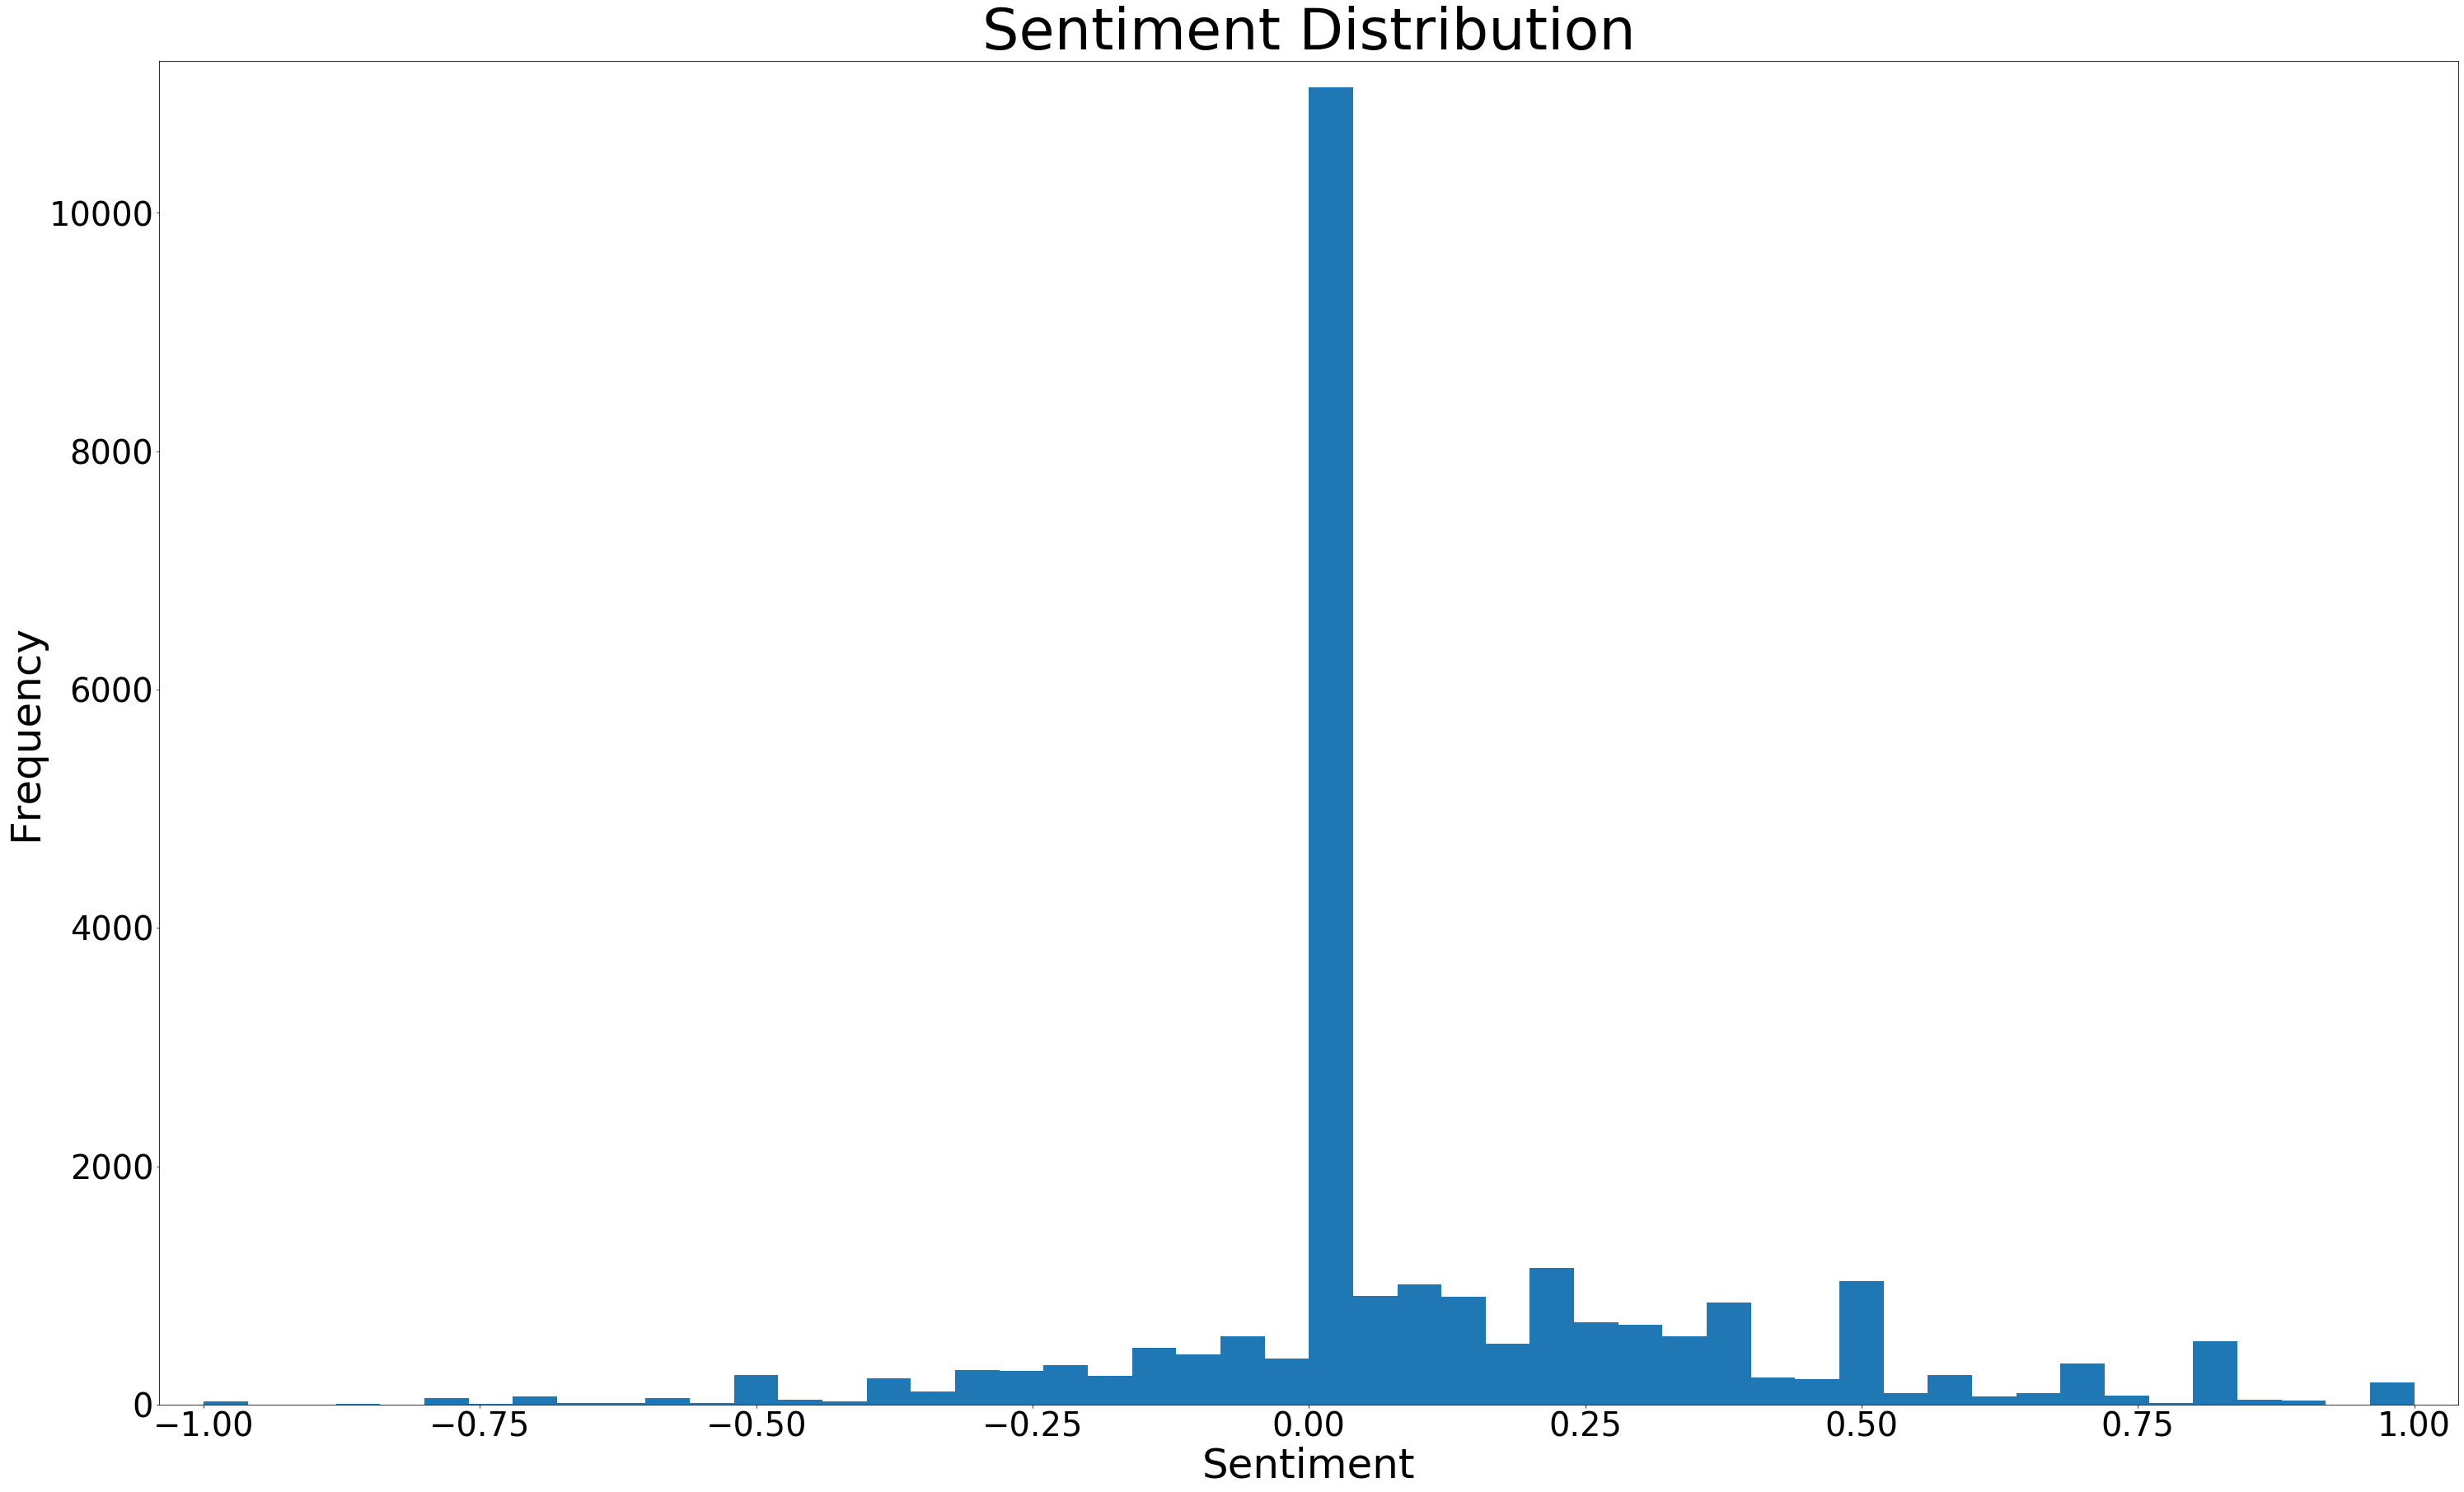

In [12]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment',fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)
plt.hist(data['sentiment'],bins=50)
plt.title('Sentiment Distribution',fontsize=70)
plt.show()

In [13]:
data['tweet_len'] = data['lemmatized'].astype(str).apply(len)
data['word_count'] = data['lemmatized'].apply(lambda x: len(str(x).split()))

In [14]:
data.head(10)

,Unnamed: 0,Text,final_data,nospace,tokenized,no_punct,sw_removed,pos_tags,wn_pos,lemmatized,string_lemma,sentiment,subjectivity,tweet_len,word_count
0,0,"The residents of Hamilton court society, Gurga...",the residents of hamilton court society gurga...,the residents of hamilton court society gurgao...,"['the', 'residents', 'of', 'hamilton', 'court'...","['the', 'residents', 'of', 'hamilton', 'court'...","['residents', 'hamilton', 'court', 'society', ...","[('residents', 'NNS'), ('hamilton', 'JJ'), ('c...","[('residents', 'n'), ('hamilton', 'a'), ('cour...","['resident', 'hamilton', 'court', 'society', '...",resident hamilton court society gurgaon come t...,0.000000,0.333333,149,14
1,1,@PMOIndia @narendramodi As a chest specialist ...,as a chest specialist doctor and responsible c...,as a chest specialist doctor and responsible c...,"['as', 'a', 'chest', 'specialist', 'doctor', '...","['as', 'a', 'chest', 'specialist', 'doctor', '...","['chest', 'specialist', 'doctor', 'responsible...","[('chest', 'JJS'), ('specialist', 'NN'), ('doc...","[('chest', 'a'), ('specialist', 'n'), ('doctor...","['chest', 'specialist', 'doctor', 'responsible...",chest specialist doctor responsible citizen wo...,0.200000,0.550000,204,19
2,2,"Janta curfew is not new to #Kashmir, we alread...",janta curfew is not new to we already exper...,janta curfew is not new to we already experien...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'already', 'experie...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'already', 'experie...",janta curfew new already experienced post th a...,0.445455,0.618182,135,15
3,3,The situation is getting worsen with every pas...,the situation is getting worsen with every pas...,the situation is getting worsen with every pas...,"['the', 'situation', 'is', 'getting', 'worsen'...","['the', 'situation', 'is', 'getting', 'worsen'...","['situation', 'getting', 'worsen', 'every', 'p...","[('situation', 'NN'), ('getting', 'VBG'), ('wo...","[('situation', 'n'), ('getting', 'v'), ('worse...","['situation', 'get', 'worsen', 'every', 'passi...",situation get worsen every passing day please ...,0.233333,0.255556,238,23
4,4,@narendramodi @PMOIndia Janta curfew is not ne...,janta curfew is not new to kashmir we already...,janta curfew is not new to kashmir we already ...,"['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'is', 'not', 'new', 'to', ...","['janta', 'curfew', 'new', 'kashmir', 'already...","[('janta', 'NN'), ('curfew', 'VBZ'), ('new', '...","[('janta', 'n'), ('curfew', 'v'), ('new', 'a')...","['janta', 'curfew', 'new', 'kashmir', 'already...",janta curfew new kashmir already experience po...,0.268182,0.477273,145,16
5,5,"Lets all participate in the ""JANATA CURFEW"" by...",lets all participate in the janata curfew by...,let us all participate in the janata curfew by...,"['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'all', 'participate', 'in', 'the...","['let', 'us', 'participate', 'janata', 'curfew...","[('let', 'VB'), ('us', 'PRP'), ('participate',...","[('let', 'v'), ('us', 'n'), ('participate', 'v...","['let', 'u', 'participate', 'janata', 'curfew'...",let u participate janata curfew stay inside ho...,0.000000,0.000000,94,11
6,6,Closed for Saturday and Sunday Deepika sales K...,closed for saturday and sunday deepika sales k...,closed for saturday and sunday deepika sales k...,"['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'for', 'saturday', 'and', 'sunday',...","['closed', 'saturday', 'sunday', 'deepika', 's...","[('closed', 'VBN'), ('saturday', 'NN'), ('sund...","[('closed', 'v'), ('saturday', 'n'), ('sunday'...","['close', 'saturday', 'sunday', 'deepika', 'sa...",close saturday sunday deepika sale katora talb...,0.100000,0.400000,102,11
7,7,Gratitude towards our protectors @PMOIndia @na...,gratitude

In [15]:
data.to_csv('lexdataviz.csv')

The dataframe obtained will be used for further visualisations in the dashboard